# **Una breve introducción al ecosisteam de Python**

<hr/>

*Por: Martin Vuelta ([zodiacfireworks](https://github.com/zodiacfireworks))*

*Email:* `martin.vuelta@softbutterfly.io`

<hr/>

## 1. ¿Qué es Python?

    Python is a programming language that lets you work more quickly and integrate your systems more effectively.

### *Ejemplos*

a. Hola Mundo

In [1]:
print("Hola Mundo!")

Hola Mundo!


b. Saludos

In [5]:
name = input("What's your name? ")
greetings = f"Hello {name}!"
print(greetings)

What's your name?  Martin


Hello Martin!


## 2. Módulos

    Consider a module to be the same as a code library. A file or set of files containing a set of functions you want to include in your application.

### *Ejemplos*

a. Gravity

In [7]:
from math import pi, sin, sqrt

def g(phi):
    sin2phi = sin(phi) ** 2
    return 9.7803253359 * ( 1 + 0.001931850400 * sin2phi ) / sqrt(1 - 0.006694384442 * sin2phi)

latitude_deg = input("What's your latitude? [deg]")
latitude_rad = float(latitude_deg) * pi / 180
gravity = f"La gravedad a {latitude_deg}deg es de {g(latitude_rad)}"
print(gravity)

What's your latitude? [deg] 12


La gravedad a 12deg es de 9.782557617920624


## 3. Paquetes

    A package, in essence, is a module or a set of modules prepared to be distributed. The most common way of distribution is through the Python Package Index (PyPI).

![Common used pakages](./resources/python-ecosystem.png)

### 3.1. Paquetes comunes en el Python club

#### Numpy

    Base N-dimensional array package

##### *Ejemplos*

In [8]:
import numpy as np

sample_array = np.array([(1.5,2,3), (4,5,6)])
sample_array

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [9]:
import numpy as np

sample_array = np.array([(1.5,2,3), (4,5,6)])
print(sample_array)

[[1.5 2.  3. ]
 [4.  5.  6. ]]


In [10]:
zeros_array = np.zeros((3,4))
print("Array of zeros")
print(zeros_array)
print()

ones_array = np.ones((2,3,4), dtype=np.int16)
print("Array of ones")
print(ones_array)
print()

empty_array = np.empty((2,3,4))
print("Empty array")
print(empty_array)

Array of zeros
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Array of ones
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]

Empty array
[[[ 4.65978884e-310  4.65978895e-310  6.92497125e-310  6.92496595e-310]
  [ 6.92496724e-310  6.92497125e-310  6.92496595e-310  6.92497123e-310]
  [ 6.92496393e-310  6.92497124e-310  6.92497123e-310  6.92497124e-310]]

 [[ 6.92497124e-310  6.92497124e-310  3.55727265e-321  3.95252517e-322]
  [ 0.00000000e+000  6.92496595e-310  4.65978795e-310  1.27726746e+013]
  [ 6.92496595e-310  4.65978795e-310 -1.44535443e-052  6.92496595e-310]]]


### Scipy 

    Fundamental library for scientific computing

##### *Ejemplos*

In [11]:
from numpy import poly1d

p = poly1d([3,4,5])
p

poly1d([3, 4, 5])

In [12]:
p = poly1d([3,4,5])
print("Plinomio")
print(p)
print()
print("Coeficientes")
print(p.coeffs)
print()
print("Raices")
print(p.roots)
print()
print("Integrate")
print(p.integ())
print()
print("Detivative")
print(p.deriv())

Plinomio
   2
3 x + 4 x + 5

Coeficientes
[3 4 5]

Raices
[-0.66666667+1.1055416j -0.66666667-1.1055416j]

Integrate
   3     2
1 x + 2 x + 5 x

Detivative
 
6 x + 4


In [13]:
import numpy as np
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
yinv = ifft(y)

print(x)
print(y)
print(yinv)

[ 1.   2.   1.  -1.   1.5]
[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


#### Matplotlib y seaborn

    Matplotlib: Comprehensive 2-D plotting

    Seaborn: Statistical data visualization

##### *Ejemplos*

In [14]:
%matplotlib inline

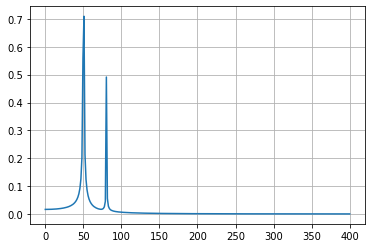

In [15]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

N = 600
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0*2.0*np.pi*x) + 0.5 * np.sin(80.0*2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

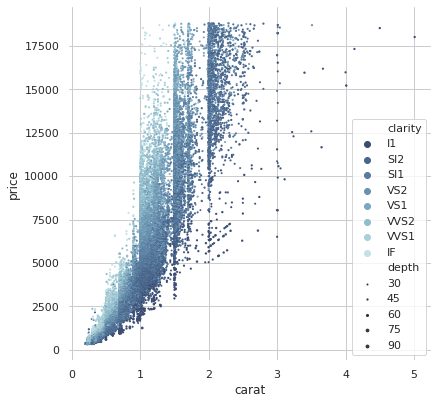

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(
    x="carat", 
    y="price",
    hue="clarity", 
    size="depth",
    palette="ch:r=-.2,d=.3_r",
    hue_order=clarity_ranking,
    sizes=(1, 8), 
    linewidth=0,
    data=diamonds, 
    ax=ax
)
plt.show()

#### Pandas

    Data structures & analysis

##### *Ejemplos*

In [17]:
import pandas as pd

dataframe = pd.read_csv("../datasets/neos.csv")
dataframe

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


#### Sympy

    Symbolic mathematics

##### *Ejemplos*

In [18]:
from sympy import *

init_printing(use_unicode=True)

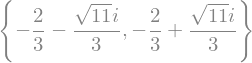

In [19]:
x = symbols('x')

solveset(3*x**2 + 4*x + 5, x)

In [20]:
from sympy import *

f = symbols('f', cls=Function)
x = symbols('x')

In [21]:
f(x)

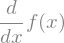

In [22]:
f(x).diff(x)

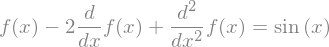

In [23]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

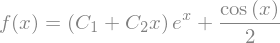

In [24]:
dsolve(diffeq, f(x))

#### Scikit learn

    Machine Learning in Python

##### *Ejemplos*

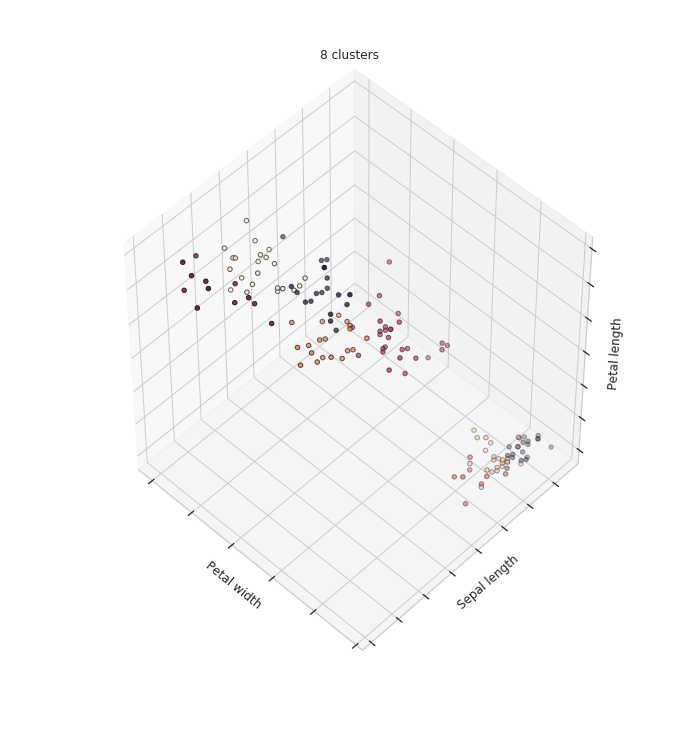

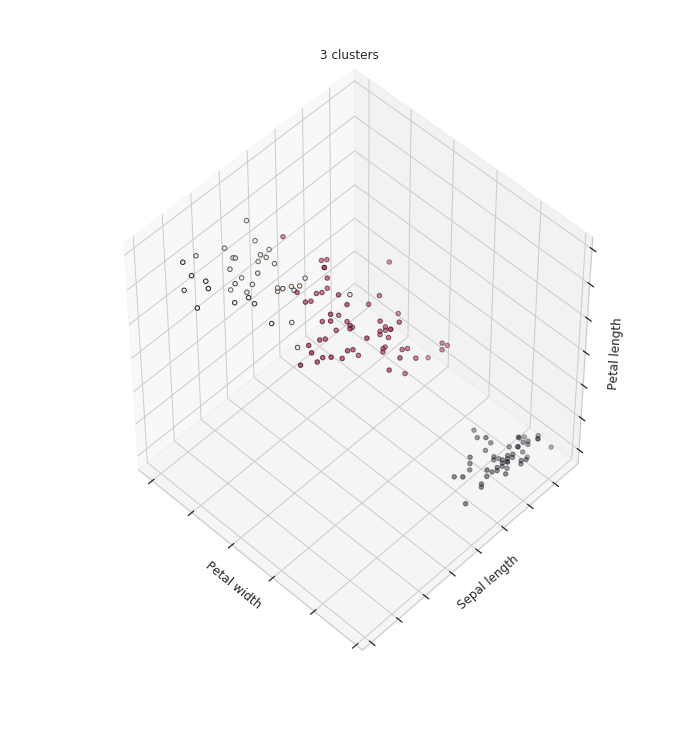

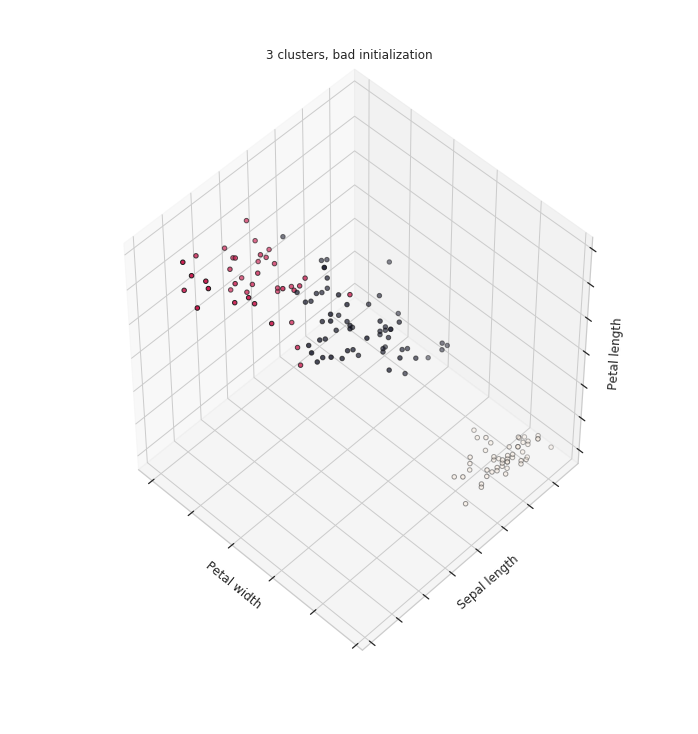

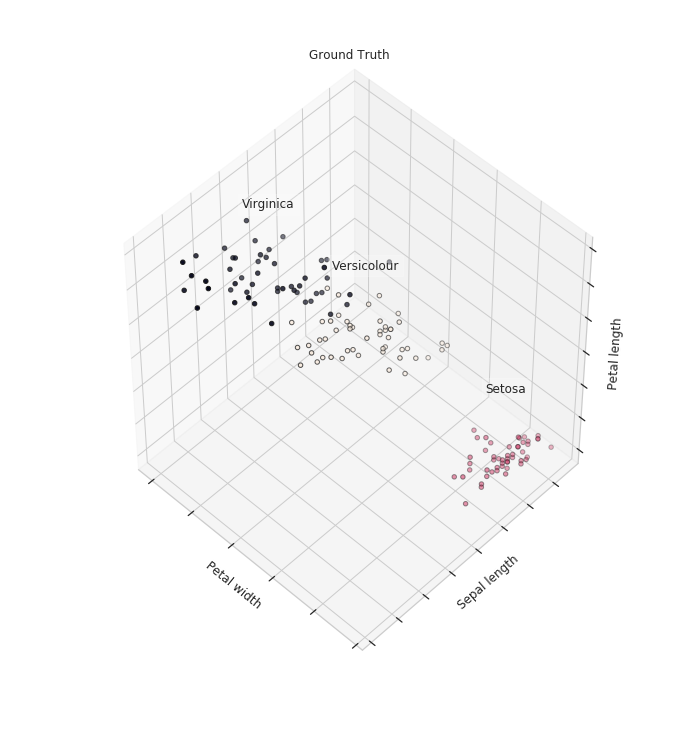

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ('k_means_iris_8', KMeans(n_clusters=8)),
    ('k_means_iris_3', KMeans(n_clusters=3)),
    ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))
]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    est.fit(X)
    labels = est.labels_

    ax.scatter(
        X[:, 3], 
        X[:, 0], 
        X[:, 2],
        c=labels.astype(np.float), 
        edgecolor='k'
    )

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2, name,
        horizontalalignment='center',
        bbox=dict(alpha=.2, edgecolor='w', facecolor='w')
    )

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()